# CADUTA LIBERA

$h = \frac{1}{2}gt^2 \Rightarrow B = \frac{1}{2}g \Rightarrow g = 2B$


linearità A + BX
    
A: 0.0009135356871497368 
B: 4.94708127579513
sigmaA: 0.002554140939644216
sigmaB: 0.028845924275309343

sigmaY: 0.002    
chiquadro ridotto: 2.77
df: 11
pvalue: 99.3%


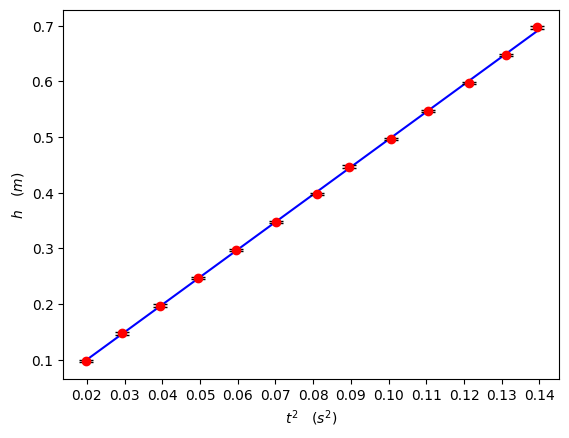

g:  9.8942 ± 0.0577 


In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata, final_val
import os

FILE = os.path.abspath('') + '/../CSV/' + 'caduta_libera.csv'
fr = pd.read_csv(FILE)

h = np.array([10,15,20,25,30,35,40,45,50,55,60,65,70]) #nomi campi per la lettura del file

t = []
err_t = []
for i in h:
    colonna = np.array(fr[str(i)])
    t.append(np.mean(colonna))
    err_t.append(np.std(colonna)/np.sqrt(len(colonna)))

t = np.array(t)/1000 # s
err_t = np.array(err_t)/1000 # s

h = h*0.01 + 0.004 + 0.009 - 0.016 # correzioni pedana
sigmaH = 0.002 # m incertezza relativa allo strumento di misura

r = RettaInterpolata(t**2,h,sigmaH)
print(r)
# plt.title("Caduta libera: $t^{2} - h$")
plt.plot(r.x_best,r.y_best,color='blue')
plt.errorbar(t**2,h,fmt='o',yerr=r.sigmaY,color="red",ecolor="black",capsize=5)
plt.xticks(np.round(t**2,2))
plt.ylabel('$h\quad(m)$')
plt.xlabel('$t^{2}\quad(s^2)$')
plt.show()


# STIMA DI G

g = 2*r.B
sigmag = 2*r.sigmaB

print('g: ',final_val(g,sigmag,decimals=4))

# EXTRA:    

PARABOLA:

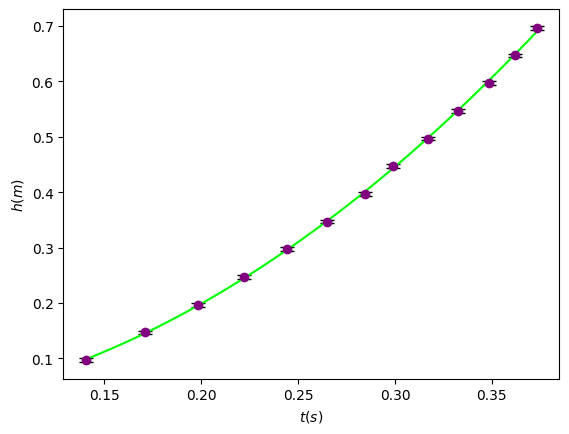

   
Parameters: {'h0': 0.0009135371483790664, 'g': 9.894162521851651} 
Sigma parameters: {'h0': 0.0025541357720106506, 'g': 0.05769177133318901}

sigmaY: 0.003327600268627675

covariance matrix: [[ 4.67075003e-06 -9.53975715e-05]
 [-9.53975715e-05  2.38301301e-03]]    



In [19]:
from interpolazione3 import Interpolazione

parabola = lambda t,h0,g: h0 + 0.5*g*t**2
p = Interpolazione(t,h,parabola,p0=[0,9.81],names=['h0','g'])
plt.errorbar(t,h,yerr=p.sigmaY,color='purple',fmt='o',ecolor='black',capsize=5)
plt.plot(p.x_best,p.y_best,color='lime')
plt.xlabel('$t(s)$')
plt.ylabel('$h(m)$')
plt.show()
print(p)

incertezza su t e su h

In [20]:
print('Er medio su t: ',np.average(err_t/t))
print('Er medio su h: ',np.average(sigmaH/h))


Er medio su t:  0.003854304790683713
Er medio su h:  0.007036489788688562
